# Section 1

In [16]:
import numpy as np
import pandas as pd
import math
from math import e
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import linregress
import csv

In [17]:
########################  SECTION 1 ######################

#part c
df = pd.read_csv('./data/GROUP1_FL.csv')
df["ID"] = np.log2((df['distance'] / df['width'])+1)
#print(df) #correct ID

# step C
The formula used to calculate ID is np.log2((distance/width) + 1), which means log_2((distance/width) + 1)

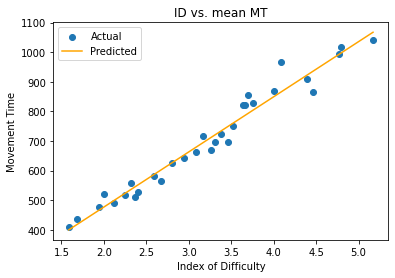

0.9642155366495379
33.75531427934165


In [18]:
########################  SECTION 1 ######################

# part d
# Use scipy.stats.linregress to estimate parameters a and b. MT = a + b * ID
b, a, r_value, p_value, std_err = linregress(df['ID'], df['movement_time'])
#print("Estimated a = ", a)
#print("Estimated b = ", b)

#df['ID'].value_counts()
#len(df['ID'].value_counts()) 31 total, works

#Group the rows by identical ID's, would return a dataframegroupby object, set it to a variable
ID_grouped = df.groupby(['ID'])     #all split up by ID, 

#ID_grouped.get_group()

#ID_grouped['movement_time'].value_counts()   #shows all MT value count for each ID group, this return is a series
mt_mean_arr = ID_grouped['movement_time'].mean()  #contains 31 averaged MT
#len(ID_grouped['movement_time'].mean())  #is 31, is everything accurate
mt_mean_df = pd.Series(mt_mean_arr)
#print(mt_mean_df)
#print(mt_mean_df.keys())
#print(mt_mean_df.values)
#print(mt_mean_df)

# part e
# Obtain predicted values
mt_predicted = []
for ID in mt_mean_df.keys():   #for each ID 
  mt_predicted.append(a + b * ID)    # MT= a + b * ID
#print(mt_predicted)   //correct

# Plot graph of ID vs mean MT
plt.scatter(mt_mean_df.keys(), mt_mean_arr, label = 'Actual')   # just use given MT in the csv, hence actual
plt.plot(mt_mean_df.keys(), mt_predicted, label = 'Predicted', color = 'orange')
plt.xlabel("Index of Difficulty")
plt.ylabel("Movement Time")
plt.title("ID vs. mean MT")
plt.legend(loc='best')
plt.show()

# part f, calculate R^2 and RSME to measure goodness of fit  Root mean squared error (RMSE) The coefficient of determination R^2
# Note: Low RMSE, high R² (the best case)

r_squared = r2_score(mt_mean_arr, mt_predicted)
print(r_squared)   #0.9642155366495379
rsme = math.sqrt(mean_squared_error(mt_mean_arr, mt_predicted))
print(rsme)
 
results_FL = {"a": [a], "b": [b], "r_squared":[r_squared], "rsme": [rsme]}
#print(results_FL)
results_FL_df = pd.DataFrame.from_dict(results_FL)
#print(results_FL_df)  #correct
#results_FL_df.to_csv('./data/results_FL.csv')


# step G
The estimated regression coefficients a and b are approximately 104.918 and 186.127, respectively. The coefficient of determination (r^2) is near 1, which indicates that the fitted regression line explains nearly all the variability of MT around its mean. Also, the RSME is close to 0, which means the data points are highly concentrated around the regression line.

# step H
This Fitts’ Law model is a very good fit for the data because of its high r^2 and low RSME values.

# Section 2-----------------------------------------------

In [19]:
########################  SECTION 2 ######################

#part c
df = pd.read_csv('./data/GROUP1_SL.csv')
df["ID"] = df['amplitude'] / df['width']
#print(df) #correct ID

# step C
The formula used to calculate ID is (amplitude / width)  

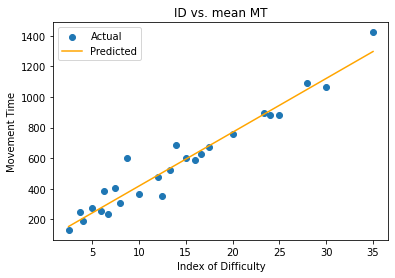

0.9426474893235502
75.50731290294472


In [20]:
########################  SECTION 2 ######################

# part d
# Use scipy.stats.linregress to estimate parameters a and b. MT = a + b * ID
b, a, r_value, p_value, std_err = linregress(df['ID'], df['movetime'])
#print("Estimated a = ", a)   # 64.93700474149836
#print("Estimated b = ", b)    # 35.221916748490266

#df['ID'].value_counts()
#len(df['ID'].value_counts()) #26 in total, works

#Group the rows by identical ID's, would return a dataframegroupby object, set it to a variable
ID_grouped = df.groupby(['ID'])     #all split up by ID, 

#ID_grouped.get_group()

#ID_grouped['movement_time'].value_counts()   #shows all MT value count for each ID group, this return is a series
mt_mean_arr = ID_grouped['movetime'].mean()  #contains 31 averaged MT
#len(ID_grouped['movement_time'].mean())  #is 31, is everything accurate
mt_mean_df = pd.Series(mt_mean_arr)
#print(mt_mean_df)
#print(mt_mean_df.keys())
#print(mt_mean_df.values)
#print(mt_mean_df)

# part e
# Obtain predicted values
mt_predicted = []
for ID in mt_mean_df.keys():   #for each ID 
  mt_predicted.append(a + b * ID)    # MT= a + b * ID
#print(mt_predicted)   #correct

# Plot graph of ID vs mean MT
plt.scatter(mt_mean_df.keys(), mt_mean_arr, label = 'Actual')   # just use given MT in the csv, hence actual
plt.plot(mt_mean_df.keys(), mt_predicted, label = 'Predicted', color = 'orange')
plt.xlabel("Index of Difficulty")
plt.ylabel("Movement Time")
plt.title("ID vs. mean MT")
plt.legend(loc='best')
plt.show()

# part f, calculate R^2 and RSME to measure goodness of fit  Root mean squared error (RMSE) The coefficient of determination R^2
# Note: Low RMSE, high R² (the best case)

r_squared = r2_score(mt_mean_arr, mt_predicted)
print(r_squared)   #0.9642155366495379
rsme = math.sqrt(mean_squared_error(mt_mean_arr, mt_predicted))
print(rsme)

results_SL = {"a": [a], "b": [b], "r_squared":[r_squared], "rsme": [rsme]}
#print(results_SL)
results_SL_df = pd.DataFrame.from_dict(results_SL)

#results_SL_df.to_csv('./data/results_SL.csv')
 


# step G
The coefficient of determination (r^2) is near 1, which indicates that the fitted regression line explains nearly all the variability of MT around its mean. Also, the RSME is close to 0, which means the data points are highly concentrated around the regression line.

# step H
This Steering Law model has a strong ability to predict and/or explain the outcome due to its high r^2 and low RSME values.